# Maps generated for the paper

- Joao Paulo G. R. Alves - 2024
- joao (dot) guilherme (dot) alves (at) usp (dot) br
- Institute of Energy and Environment - University of Sao Paulo

In [1]:
import os
import rasterio
import numpy as np
import pandas as pd
import geopandas as gpd
from rasterio.plot import show
import matplotlib.pyplot as plt
from shapely.geometry.point import Point

import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from matplotlib.ticker import FixedLocator, FixedFormatter

import matplotlib.ticker as ticker
import matplotlib.patches as mpatches
import matplotlib.lines as mlines
from rasterio.plot import show, show_hist, plotting_extent

from cmaptools import readcpt
from matplotlib.patches import Patch
from matplotlib.patches import Rectangle

In [2]:
tifs_folder = '/home/joao/Documents_Ubuntu/ml_basalts_ccs/Maps/TIF_Images_500m'
vectors_folder = '/home/joao/Documents_Ubuntu/ml_basalts_ccs/Maps/VectorData'

In [3]:
ordered_filenames = [
    'Density.tif', 'Porosity.tif', 'Permeability.tif'
]

In [4]:
geotiffs = [os.path.join(tifs_folder, fname) 
            for fname in ordered_filenames 
            if os.path.exists(os.path.join(tifs_folder, fname))]

In [5]:
geotiffs

['/home/joao/Documents_Ubuntu/ml_basalts_ccs/Maps/TIF_Images_500m/Density.tif',
 '/home/joao/Documents_Ubuntu/ml_basalts_ccs/Maps/TIF_Images_500m/Porosity.tif',
 '/home/joao/Documents_Ubuntu/ml_basalts_ccs/Maps/TIF_Images_500m/Permeability.tif']

In [6]:
ordered_vectors = [
'ExploratoryWells.gpkg',
'SerraGeral.gpkg',
'Estados_sul.gpkg'
]

In [7]:
vectors = [os.path.join(vectors_folder, fname) 
            for fname in ordered_vectors 
            if os.path.exists(os.path.join(vectors_folder, fname))]

In [8]:
vectors

['/home/joao/Documents_Ubuntu/ml_basalts_ccs/Maps/VectorData/ExploratoryWells.gpkg',
 '/home/joao/Documents_Ubuntu/ml_basalts_ccs/Maps/VectorData/SerraGeral.gpkg',
 '/home/joao/Documents_Ubuntu/ml_basalts_ccs/Maps/VectorData/Estados_sul.gpkg']

In [9]:
estados = gpd.read_file(vectors[2])

In [10]:
df = pd.DataFrame()

df['tifs'] = geotiffs

df['labels'] = ['(a) Density', '(b) Porosity', '(c) Permeability']

df['units'] = ['(g/cm\u00b3)', '(%)', '(\u00b5D)']

In [11]:
df.head()

,tifs,labels,units
0,/home/joao/Documents_Ubuntu/ml_basalts_ccs/Map...,(a) Density,(g/cm³)
1,/home/joao/Documents_Ubuntu/ml_basalts_ccs/Map...,(b) Porosity,(%)
2,/home/joao/Documents_Ubuntu/ml_basalts_ccs/Map...,(c) Permeability,(µD)


In [12]:
shapefile = gpd.read_file(vectors[1])

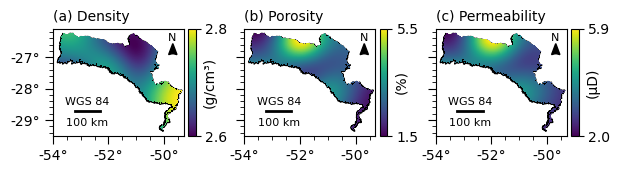

In [ ]:
fig, axes = plt.subplots(1,3, figsize=(7,3), sharey=True, sharex=True)

for i, ax in enumerate(axes.flatten()):
    
    with rasterio.open(df.tifs[i]) as src:
        data = src.read(1)

    #Use this if your nodata is not nan
    #nodata_value = src.nodata
    #if nodata_value is not None:
        #data[data == nodata_value] = np.nan

    img = ax.imshow(data, cmap='viridis', extent = rasterio.plot.plotting_extent(src), 
                    interpolation = 'none', zorder=1)
    
    shapefile.boundary.plot(ax=ax, edgecolor='black', facecolor='black', linewidth=1, zorder=0)
    
    cbar = fig.colorbar(img, ax=ax, shrink=0.465, aspect=15, pad=0.03)

    min_val = np.nanmin(data)
    max_val = np.nanmax(data)

    cbar.set_ticks([min_val, max_val])
    cbar.set_ticklabels([f'{min_val:.1f}', f'{max_val:.1f}'])
    cbar.set_label(df.units[i], rotation='vertical', labelpad=-18)
    
    ax.xaxis.set_minor_locator(ticker.AutoMinorLocator())
    ax.yaxis.set_minor_locator(ticker.AutoMinorLocator())
    ax.tick_params(which='minor', direction='out', size=3)
    ax.tick_params(which='major', direction='out', size=6)
    
    x_min, x_max = ax.get_xlim()
    x_ticks = np.arange(int(x_min), int(x_max) + 1, 2)
    ax.xaxis.set_major_locator(FixedLocator(x_ticks))
    ax.xaxis.set_major_formatter(FixedFormatter([f"{int(tick)}\u00B0" for tick in x_ticks]))

    
    y_min, y_max = ax.get_ylim()
    y_ticks = np.arange(int(y_min), int(y_max) + 1, 1)
    ax.yaxis.set_major_locator(FixedLocator(y_ticks))  # Set the locator
    ax.yaxis.set_major_formatter(FixedFormatter([f"{tick}\u00B0" for tick in y_ticks]))

    # Set limits
    ax.set_xlim(-54, -49.3)
    ax.set_ylim(-29.5, -26.1)

    ax.text(x=-54, y=-25.85, s=df.labels[i], fontsize=10)

    ax.text(x=-49.85, y=-26.5, s='N', fontsize=8, zorder=6)
    ax.arrow(-49.69, -26.75, 0, 0.18, length_includes_head=True, 
             head_width=0.3, head_length=0.35, overhang=.1, 
             facecolor='k', zorder=1)

    # Calculate km per degree at a specific latitude
    bar_km = 100  # Length of scale bar in kilometers
    km_per_degree = 111  # Approximate conversion at equator
    bar_degrees = bar_km / km_per_degree
    scalebar_x = -53.22  # Scale bar longitude
    scalebar_y = -28.72  # Scale bar latitude

    # Plot scale bar
    # Plot scale bar on the map
    ax.plot([scalebar_x, scalebar_x + bar_degrees], [scalebar_y, scalebar_y], 
            transform=ax.transData, color='black', linewidth=2)
    ax.text(-52.75, -28.51, 'WGS 84', 
            horizontalalignment='center', fontsize=8, transform=ax.transData)
    ax.text(-52.76, -29.20, f'{bar_km} km', 
            horizontalalignment='center', fontsize=8, transform=ax.transData)

fig.subplots_adjust(hspace=-0.6)
plt.show()

In [ ]:
with rasterio.open('/home/joao/Documents_Ubuntu/ml_basalts_ccs/Maps/Background/Terrain.tif') as src:
    ter = src.read(1)
    ter[ter == -9999.0] = np.nan

with rasterio.open('/home/joao/Documents_Ubuntu/ml_basalts_ccs/Maps/Background/Terrain_Hillshade.tif') as hsrc:
    hter = hsrc.read(1)

with rasterio.open('/home/joao/Documents_Ubuntu/ml_basalts_ccs/Maps/Background/Bathymetry.tif') as baty:
    bat = baty.read(1)

In [ ]:
cptfile = '/home/joao/Documents_Ubuntu/ml_basalts_ccs/Maps/ColorPallets/DEM_print.cpt'

In [ ]:
cmap1 = readcpt(cptfile, hinge=None)

In [ ]:
vector = gpd.read_file(vectors[0])

In [ ]:
rows_to_drop = [10, 15, 4]

In [ ]:
dropped_rows = vector.iloc[rows_to_drop].reset_index(drop=True)

In [ ]:
vector = vector.drop(rows_to_drop).reset_index(drop=True)

In [ ]:
fig, ax = plt.subplots(1,1, figsize=(3.5,3))

img1 = ax.imshow(hter, cmap="gray", extent = rasterio.plot.plotting_extent(hsrc), 
                 interpolation = 'none', alpha = 0.6, zorder=0)
    
img2 = ax.imshow(ter, cmap=cmap1, extent = rasterio.plot.plotting_extent(src), 
                 interpolation = 'none', alpha = 0.5, zorder=1)

img3 = ax.imshow(bat, cmap='ocean', extent = rasterio.plot.plotting_extent(baty), 
                 interpolation = 'none', alpha = 0.5, zorder=2)

estados.boundary.plot(ax=ax, edgecolor='black', facecolor='none', linewidth=0.5, zorder=3)
shapefile.boundary.plot(ax=ax, edgecolor='black', facecolor='grey', 
                        alpha=0.4, linewidth=0.5, zorder=4)
 
vector.plot(ax=ax, marker='o', color = 'white', edgecolor='black', 
            linewidth=0.5, markersize=70, alpha=0.9, zorder=5)

dropped_rows.plot(ax=ax, marker='o', color = 'yellow', edgecolor='black', 
            linewidth=0.5, markersize=70, alpha=0.9, zorder=6)

ax.text(x=-53, y=-26.1, s='PR', fontsize=12)
ax.text(x=-49.9, y=-27.5, s='SC', fontsize=12)
ax.text(x=-52.2, y=-28.3, s='RS', fontsize=12)
    
ax.xaxis.set_minor_locator(ticker.AutoMinorLocator())
ax.yaxis.set_minor_locator(ticker.AutoMinorLocator())
ax.tick_params(which='minor', direction='out', size=3)
ax.tick_params(which='major', direction='out', size=6)
    
ax.xaxis.set_minor_locator(ticker.AutoMinorLocator())
ax.yaxis.set_minor_locator(ticker.AutoMinorLocator())
ax.tick_params(which='minor', direction='out', size=3)
ax.tick_params(which='major', direction='out', size=6)
    
x_min, x_max = ax.get_xlim()
x_ticks = np.arange(int(x_min), int(x_max) + 1, 1)
ax.xaxis.set_major_locator(FixedLocator(x_ticks))  # Set the locator
ax.xaxis.set_major_formatter(FixedFormatter([f"{int(tick)}\u00B0" for tick in x_ticks]))

# Set y-ticks at every 1-degree interval and update with degree symbol
y_min, y_max = ax.get_ylim()
y_ticks = np.arange(int(y_min), int(y_max) + 1, 1)
ax.yaxis.set_major_locator(FixedLocator(y_ticks))  # Set the locator
ax.yaxis.set_major_formatter(FixedFormatter([f"{tick}\u00B0" for tick in y_ticks]))

ax.text(x=-49.66, y=-25.83, s='N', fontsize=8, zorder=5)
ax.arrow(-49.58, -26.06, 0, 0.18, length_includes_head=True, 
         head_width=0.18, head_length=0.22, overhang=.1, 
         facecolor='k', zorder=6)

# Set limits
ax.set_xlim(-54, -49.3)
ax.set_ylim(-29.5, -25.55)

def km_per_degree_longitude(latitude):
    # Radius of the Earth in kilometers
    R = 6371.0
    # Convert latitude to radians
    lat_rad = np.radians(latitude)
    # Calculate km per degree of longitude
    return np.pi * R * np.cos(lat_rad) / 180

# Use the function at your specific latitude
latitude_for_scale = -29  # The latitude at which you want to calculate the scale
km_per_degree = km_per_degree_longitude(latitude_for_scale)

# Add scale bar
# Calculate scale bar size in degrees at an approximate central latitude
bar_km = 100  # length of the scale bar in kilometers
km_per_degree = 111  # approximate conversion factor at equator
bar_degrees = bar_km / km_per_degree

# Plot scale bar on the map
scalebar_x = -53.5 
scalebar_y = -29  

# Determine the size and position of the rectangle
rect_x = -53.56  # x position
rect_y = -29.28  # y position
rect_width = 1.05  # width 
rect_height = 0.6  # height 

# Create the rectangle patch
scalebar_background = Rectangle((rect_x, rect_y), 
                                rect_width, 
                                rect_height, 
                                facecolor='white', 
                                edgecolor='black',
                                linewidth=0.5)

ax.add_patch(scalebar_background)

ax.plot([scalebar_x, scalebar_x + bar_degrees], [scalebar_y, scalebar_y], 
        transform=plt.gca().transData, color='black', linewidth=2)
ax.text(-53, -28.90, 'WGS 84', 
        horizontalalignment='center', fontsize=8)
ax.text(-53, -29.25, f'{bar_km} km', 
        horizontalalignment='center', fontsize=8)

plt.show()

In [ ]:
cont_data = '/home/joao/Documents_Ubuntu/ml_basalts_ccs/Maps/Background'

america = gpd.read_file(os.path.join(cont_data, 'America.gpkg'))

brasil = gpd.read_file(os.path.join(cont_data, 'Brasil.gpkg'))

brasilds = gpd.read_file(os.path.join(cont_data, 'BrasilDissolved.gpkg'))

bacia = gpd.read_file(os.path.join(cont_data, 'Bacia.gpkg'))

serra = gpd.read_file(os.path.join(cont_data, 'SerraGeralTotal.gpkg'))

area = gpd.read_file(os.path.join(cont_data, 'Area.gpkg'))

In [ ]:
fig, ax = plt.subplots(1,1, figsize=(3.5, 5))

america.boundary.plot(ax=ax, 
                      edgecolor='black', 
                      facecolor='darkgrey', 
                      linewidth=0.2, 
                      zorder=0)

brasilds.boundary.plot(ax=ax, 
                       edgecolor='black', 
                       facecolor='lightgray', 
                       linewidth=0.2, 
                       zorder=1)

bacia.boundary.plot(ax=ax, 
                    edgecolor='black', 
                    facecolor='palegoldenrod', 
                    linewidth=0.3, 
                    zorder=2)

serra.boundary.plot(ax=ax, 
                    edgecolor='black', 
                    facecolor='sandybrown', 
                    linewidth=0.08, 
                    zorder=3)

brasil.boundary.plot(ax=ax, 
                     edgecolor='black', 
                     facecolor='none', 
                     linewidth=0.2, 
                     zorder=4)

area.boundary.plot(ax=ax, 
                   edgecolor='red', 
                   facecolor='none', 
                   linewidth=1.3, 
                   zorder=5)

# Patches for the legend
legend_patches = [
    Patch(facecolor='darkgrey', edgecolor='black', linewidth=0.5, label='South American Continent'),
    Patch(facecolor='lightgray', edgecolor='black', linewidth=0.5, label='States of Brazil'),
    Patch(facecolor='palegoldenrod', edgecolor='black', linewidth=0.5, label='Paraná Basin'),
    Patch(facecolor='sandybrown', edgecolor='black', linewidth=0.5, label='Serra Geral Group'),
    Patch(facecolor='none', edgecolor='red', linewidth=1.3, label='Study Area')
]

# Legend to the plot
ax.legend(handles=legend_patches, loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=1)

ax.tick_params(which='major', direction='out', size=6)
    
x_ticks = np.arange(-70, -30, 10)
ax.xaxis.set_major_locator(FixedLocator(x_ticks))
ax.xaxis.set_major_formatter(FixedFormatter([f"{int(tick)}\u00B0" for tick in x_ticks]))

y_ticks = np.arange(-30, 10, 10)
ax.yaxis.set_major_locator(FixedLocator(y_ticks)) 
ax.yaxis.set_major_formatter(FixedFormatter([f"{tick}\u00B0" for tick in y_ticks]))

ax.set_xlim(-75, -34)
ax.set_ylim(-35, 6)

ax.text(x=-38.17, y=3, s='N', fontsize=8, zorder=6)
ax.arrow(-37.5, 2.2, 0, 0.18, length_includes_head=True, 
         head_width=1.5, head_length=1.8, overhang=.1, 
         facecolor='k', zorder=6)

def km_per_degree_longitude(latitude):
    # Radius of the Earth in kilometers
    R = 6371.0
    # Convert latitude to radians
    lat_rad = np.radians(latitude)
    # Calculate km per degree of longitude
    return np.pi * R * np.cos(lat_rad) / 180

# Funct for Lat
latitude_for_scale = -30  
km_per_degree = km_per_degree_longitude(latitude_for_scale)

# Scale bar
# Calculate scale bar size in degrees at an approximate central latitude
bar_km = 500  # length of the scale bar in kilometers
km_per_degree = 111  # approximate conversion factor at equator
bar_degrees = bar_km / km_per_degree

# Plot scale bar on the map
scalebar_x = -70  # longitude position
scalebar_y = -30  # latitude position 

# Determine the size and position of the rectangle
rect_x = scalebar_x-1.5  
rect_y = scalebar_y - 3  
rect_width = bar_degrees+3  
rect_height = 6  

# Create the rectangle patch
scalebar_background = Rectangle((rect_x, rect_y), 
                                rect_width, 
                                rect_height, 
                                facecolor='white', 
                                edgecolor='black',
                                linewidth=0.5)

ax.add_patch(scalebar_background)

ax.plot([scalebar_x, scalebar_x + bar_degrees], [scalebar_y, scalebar_y], 
        transform=plt.gca().transData, color='black', linewidth=2)
ax.text(scalebar_x + bar_degrees / 2, scalebar_y + 1.5, 'WGS 84', 
        horizontalalignment='center', fontsize=8)
ax.text(scalebar_x + bar_degrees / 2, scalebar_y - 2.3, f'{bar_km} km', 
        horizontalalignment='center', fontsize=8)

plt.show()